## DifferentialEquations.jlの紹介


### これは何か？

Juliaで書かれたODEソルバーの代表的なパッケージ。速度と様々なタイプのODEや制御に対応していることに定評がある。
例えば、普通の常微分方程式だけでなく
- 確率微分方程式
- Delay微分方程式
- Feedback制御
に対応する

オリジナルのWebサイトの紹介


https://github.com/JuliaDiffEq/DifferentialEquations.jl

http://www.stochasticlifestyle.com/wp-content/uploads/2017/10/de_solver_software_comparsion-3.pdf


### 基本的な使い方

ドキュメントが非常によく書かれているので、基本的にそれに沿って説明する

http://docs.juliadiffeq.org/latest/tutorials/ode_example.html

基本的な流れは

1. 問題を定義する ODEProblem()
2. 解く solve()
3. 結果の解析・プロット sol[] plot()

### 簡単な常微分方程式

以下の方程式を解く

\begin{align}
  \frac{d u}{d t}=f(u, p, t) = \alpha u \\
\end{align}

ここで、$t\in [0, 1]$、$u(t) = u_0 \exp(\alpha t)$。



In [7]:
# 問題の定義
using DifferentialEquations
f(u,p,t) = 1.01*u
u0=1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 0.5

In [40]:
# 問題を解く

sol = solve(prob)
#sol = solve(prob, saveat=0.1) #0.1毎に解を保存する
#sol = solve(prob,save_everystep=false) #毎ステップ、解を保存する
#sol = solve(prob,alg_hints=[:stiff]) #問題がStiffであることを伝えて、ソルバーを選択してもらう
#sol = solve(prob,Tsit5()) #直接ソルバーを指定する Tsitouras 5/4 Runge-Kutta method

retcode: Success
Interpolation: Automatic order switching interpolation
t: 1314-element Array{Float64,1}:
   0.0                 
   0.03663019341700964 
   0.060934815384410465
   0.10228522618635227 
   0.14389498036867043 
   0.19115892077660712 
   0.23901916417013608 
   0.2896805822413063  
   0.3416978677737156  
   0.38899459336362885 
   0.4356801826096034  
   0.47644638325151356 
   0.5344601355432881  
   ⋮                   
  99.2860253046323     
  99.35856496708197    
  99.45170420536442    
  99.54438725006028    
  99.62207327894252    
  99.68787594922622    
  99.74756339980605    
  99.80648794369694    
  99.87138616459941    
  99.93724086198732    
  99.99832579968145    
 100.0                 
u: 1314-element Array{Array{Float64,1},1}:
 [1.0, 1.0, 1.0]               
 [1.15769, 1.9886, 0.962334]   
 [1.4221, 2.77173, 0.973833]   
 [2.18733, 4.59372, 1.12944]   
 [3.48735, 7.43234, 1.67646]   
 [5.93401, 12.5167, 3.54752]   
 [9.90211, 19.93, 8.90865]     
 [1

In [23]:
# 結果の取得

# 結果(sol)はsolutionオブジェクトという独自オブジェクトとして出力されるが、配列・構造体のように扱うことができる。

sol[5]

sol.t[5]

#結果を配列にまとめる
[t+u for (u,t) in tuples(sol)]

#t=0.45での解をinterpolateする
sol(0.45)


0.7876929040123316

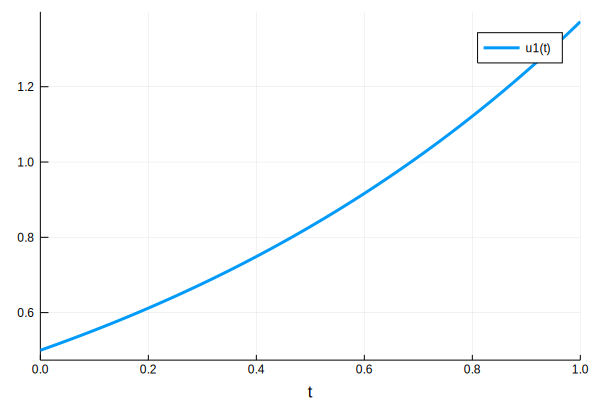

In [24]:
# 結果のプロット

using Plots
plot(sol)

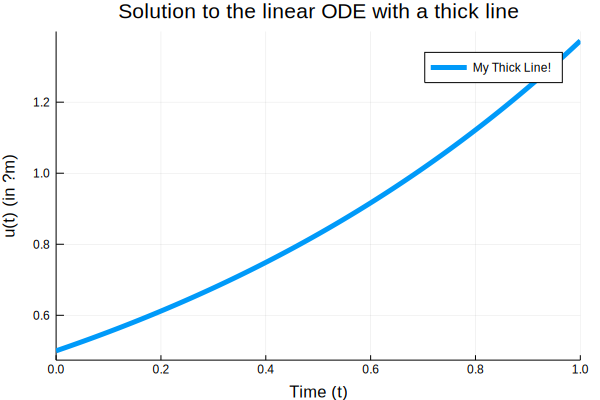

In [25]:
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!") # legend=false

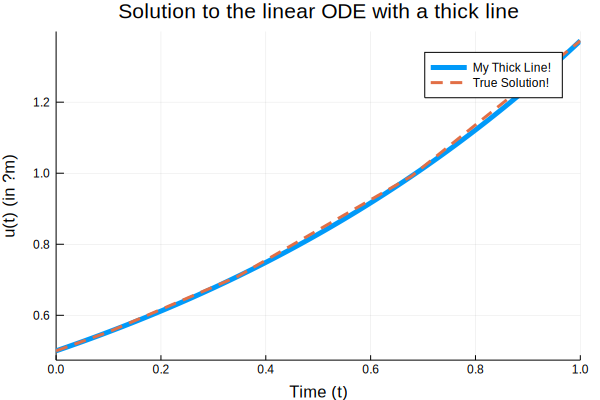

In [26]:
plot!(sol.t,t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")

### Lorenzアトラクタ

\begin{align}
  {\frac{d x}{d t}=\sigma(y-x)} \\
  {\frac{d y}{d t}=x(\rho-z) -y} \\
  {\frac{d z}{d t}=x y-\beta z}
\end{align}

ここで、$\sigma=10$、$\rho=28$、$\beta=8/3$。

In [28]:
# 問題の定義

function lorenz(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end

# duについてちょっと説明

lorenz (generic function with 1 method)

In [41]:
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz,u0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 1287-element Array{Float64,1}:
   0.0                  
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624016752212923
   0.00905808176456279  
   0.0169564955927642   
   0.02769000245764448  
   0.04185634375662893  
   0.06024025665362463  
   0.0836852441654334   
   0.11336451506889586  
   0.14862131186030308  
   0.18703929175446188  
   ⋮                    
  99.17448947475748     
  99.25177886977121     
  99.3340481055892      
  99.40002509604705     
  99.47321520444633     
  99.54429913558833     
  99.6304176475736      
  99.73556893651245     
  99.81512588011671     
  99.88533419341042     
  99.94751447208056     
 100.0                  
u: 1287-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]                    
 [0.999643, 0.000998805, 1.78143e-8]
 [0.996105, 0.0109654, 2.14696e-6]  
 [0.969359, 0.0897704, 0.000143801] 
 [0.924204, 0.242289, 0.00104616]   
 [0.880045, 0.43

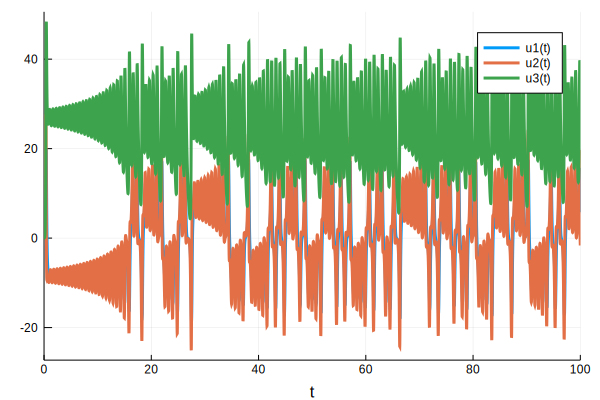

In [59]:
plot(sol)

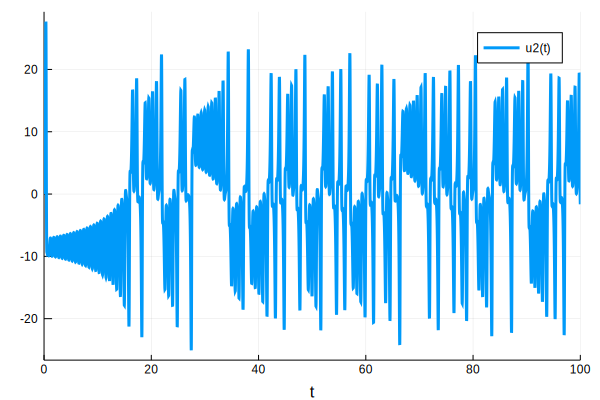

In [60]:
plot(sol,vars=(0,2))

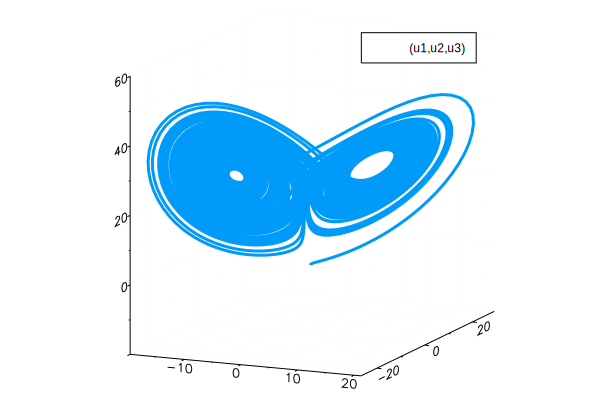

In [31]:
plot(sol,vars=(1,2,3))

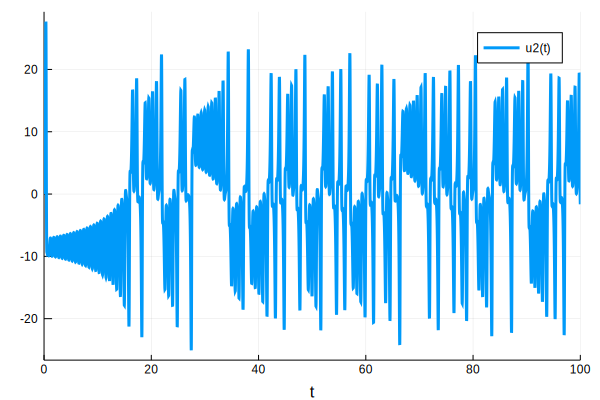

In [57]:
plot(sol,vars=(0,2))

### 速度を計測してみよう

In [45]:
# 速度計測

u0 = [1.0;1.0;1.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz,u0,tspan)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [1.0, 1.0, 1.0]

In [51]:
using BenchmarkTools
@btime sol = solve(prob, saveat=0.01, reltol=1e-6, abstol=1e-8)

  4.410 ms (33339 allocations: 3.92 MiB)


retcode: Success
Interpolation: 1st order linear
t: 10001-element Array{Float64,1}:
   0.0 
   0.01
   0.02
   0.03
   0.04
   0.05
   0.06
   0.07
   0.08
   0.09
   0.1 
   0.11
   0.12
   ⋮   
  99.89
  99.9 
  99.91
  99.92
  99.93
  99.94
  99.95
  99.96
  99.97
  99.98
  99.99
 100.0 
u: 10001-element Array{Array{Float64,1},1}:
 [1.0, 1.0, 1.0]             
 [1.01257, 1.25992, 0.984891]
 [1.04882, 1.524, 0.973114]  
 [1.10721, 1.79831, 0.965159]
 [1.18687, 2.08855, 0.961737]
 [1.28755, 2.40016, 0.963806]
 [1.40957, 2.73855, 0.972608]
 [1.55369, 3.10916, 0.989731]
 [1.72115, 3.51758, 1.01719] 
 [1.9136, 3.96962, 1.05751]  
 [2.13311, 4.47142, 1.1139]  
 [2.38215, 5.02943, 1.19035] 
 [2.66358, 5.65045, 1.29189] 
 ⋮                           
 [12.8554, 17.9693, 26.3729] 
 [13.3402, 17.8961, 27.9999] 
 [13.7615, 17.6066, 29.6403] 
 [14.1043, 17.091, 31.2492]  
 [14.3544, 16.3506, 32.7784] 
 [14.4999, 15.3987, 34.1793] 
 [14.5318, 14.2612, 35.4072] 
 [14.4448, 12.9745, 36.4249] 
 [14

In [47]:
using BenchmarkTools
@btime sol = solve(prob, adaptive=false, dt=0.01)

  4.967 ms (100176 allocations: 10.56 MiB)


retcode: Success
Interpolation: Automatic order switching interpolation
t: 10001-element Array{Float64,1}:
   0.0                 
   0.01                
   0.02                
   0.03                
   0.04                
   0.05                
   0.060000000000000005
   0.07                
   0.08                
   0.09                
   0.09999999999999999 
   0.10999999999999999 
   0.11999999999999998 
   ⋮                   
  99.8900000000142     
  99.9000000000142     
  99.91000000001421    
  99.92000000001421    
  99.93000000001422    
  99.94000000001422    
  99.95000000001423    
  99.96000000001423    
  99.97000000001424    
  99.98000000001424    
  99.99000000001425    
 100.0                 
u: 10001-element Array{Array{Float64,1},1}:
 [1.0, 1.0, 1.0]             
 [1.01257, 1.25992, 0.984891]
 [1.04882, 1.524, 0.973114]  
 [1.10721, 1.79831, 0.965159]
 [1.18687, 2.08855, 0.961737]
 [1.28755, 2.40016, 0.963806]
 [1.40957, 2.73855, 0.972608]
 [1.55369, 3.10

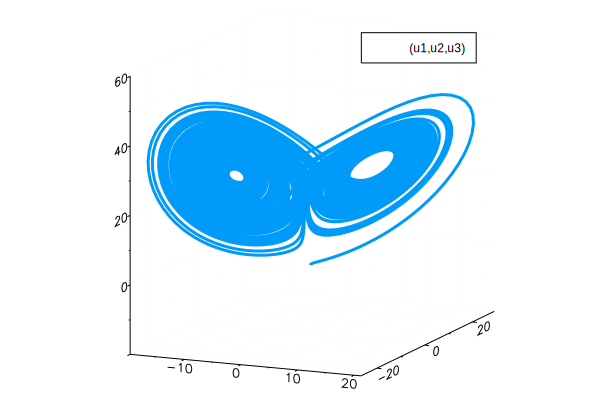

In [48]:
plot(sol,vars=(1,2,3))